In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
#convert string dates to proper format
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [3]:
#read_data
sales=pd.read_csv(r'C:\Users\Documents\Personal\sales-cars.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [8]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


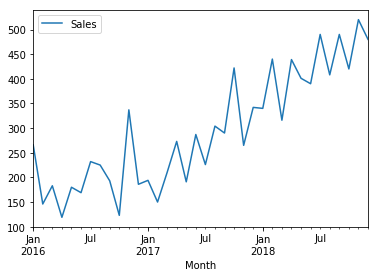

In [9]:
#plot dataset
sales.plot()
plt.show()

In [10]:
#stationarity check: mean, variance and covariance are constant over periods

C:\Users\1007641\Documents\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


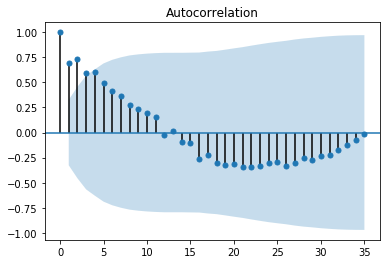

In [11]:
#ACF plot(auto correlation function)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [12]:
#equivalent how autocorrelation works mathematically
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [13]:
#converting series to stationary using difference method

In [14]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [15]:
sales_diff=sales.diff(periods=1) #integrated of order 1 as we are lagging 1 period
#denoted by d(for diff), one of the parameters of ARIMA model

In [16]:
sales_diff=sales_diff[1:] #chopping off null value
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


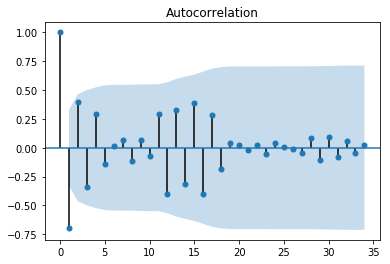

In [17]:
#autocorrelation check for sales_diff
plot_acf(sales_diff)

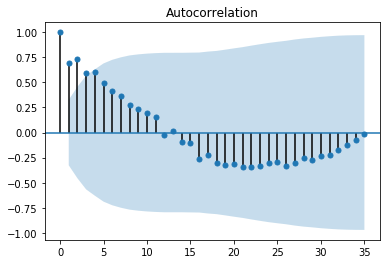

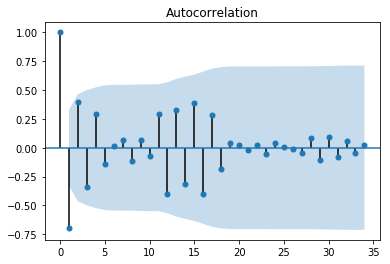

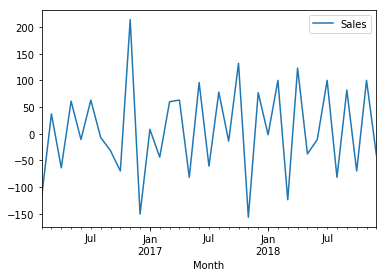

In [18]:
#sales_diff plot
sales_diff.plot()
plt.show() #shows that difference data is stationary

In [19]:
#train_test_split
X=sales.values
X.size


36

In [49]:
train=X[0:27] #27 data as train data
test=X[26:] #9 data as test data
predictions=[]

In [21]:
#autoregressive model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train)
model_ar_fit=model_ar.fit()


In [36]:
predictions=model_ar_fit.predict(start=27,end=36) #AR model predictions

In [37]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

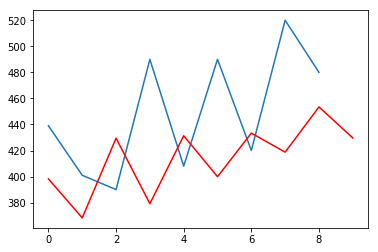

In [38]:
#AR model o/p compared to actual value
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [39]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

In [65]:
#parameters p,d,q p=periods taken in AR model,d=order of integration/integrated order,q=periods in moving average model
train = train.astype('float32')
model_arima=ARIMA(train,order=(3,1,0))
#

In [66]:
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

294.8543584218648


In [67]:
#forcast values
predictions1=model_arima_fit.forecast(steps=10)[0]
predictions1

array([ 393.1249113 ,  367.08447833,  432.19167124,  370.18114051,
        424.07798403,  400.33337342,  444.76770543,  412.54144054,
        450.3591618 ,  434.28295727])

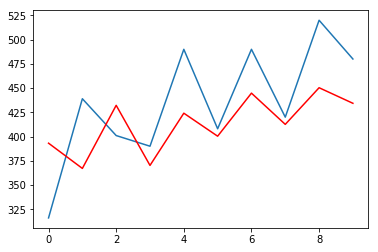

In [68]:
#test data vs ARIMA predictions plot
plt.plot(test)
plt.plot(predictions1, color='red')
plt.show()

In [69]:
#find mean squared error, should be minimum
mean_squared_error(test,predictions1)

2593.1776021459073

In [70]:
#loop ARIMA for p,d,q values
import itertools
p=d=q=range(0,9)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [71]:
#to find which combination gives min values
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.452858523
(0, 0, 1) 318.7244809387667
(0, 0, 2) 315.2506002879254
(0, 0, 3) nan
(0, 0, 4) 310.16693285763427
(0, 0, 5) 308.88294635155904
(0, 0, 7) 312.8727661943888
(0, 1, 0) 311.829398349
(0, 1, 1) 296.0841521634051
(0, 1, 2) 296.3229226907778
(0, 2, 0) 329.183495825
(0, 2, 1) 306.1019476138109
(1, 0, 0) 316.1668717522467
(1, 0, 1) 313.0487174409318
(1, 0, 2) 310.9790642503569
(1, 0, 4) 309.6779931142214
(1, 1, 0) 298.8325442271416
(1, 1, 1) 297.1256511258506
(1, 1, 2) 299.47166670628917
(1, 1, 3) 301.2851180948129
(1, 1, 4) 299.97873239708645
(1, 2, 0) 306.53077675715645
(1, 2, 3) 290.32533937089215
(1, 2, 5) 294.6437613589402
(2, 0, 0) 310.99695736332495
(2, 1, 0) 300.20895612400005
(2, 1, 1) 297.9999930167337
(2, 1, 2) 298.5505428130234
(2, 1, 3) 302.87208515064935
(2, 1, 5) 296.364009783009
(2, 2, 0) 306.2975856432396
(3, 0, 0) 312.9838587460961
(3, 0, 1) 338.04154138399485
(3, 1, 0) 294.8543584218648
(3, 1, 1) 295.99793534184437
(3, 1, 2) 292.6686238694716
(3, 1, 3